<center>
<img src='https://blog.adioma.com/wp-content/uploads/2018/11/big-five-personality-traits-infographic.png' width='500'>

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter('ignore')

import pylab as pl
# Plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.ticker as mtick

### Table of Contents

* 1. Exploratory Data Analysis

* 2. Big Five personality traits

    * 2.1. Q&As Related to Extroversion Personality
    * 2.2. Q&As Related to Neuroticism Personality
    * 2.3. Q&As Related to Agreeable Personality
    * 2.4. Q&As Related to Conscientious Personality
    * 2.5. Q&As Related to Open Personality
 
* 3. Clustering
    * 3.1 PCA
    * 3.1 K-means
        * 3.2.1 Using elbow method to determine best number of clusters
        * 3.2.2 Using silhouette method to determine best number of clusters
    * 3.3  Analyzing model and predictions


   
    

In [74]:
df = pd.read_csv('dataset.csv', delimiter='\t')
df

,EXT1,EXT2,EXT3,EXT4,EXT5,...,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,...,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,...,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,...,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,...,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,...,17,2,KE,1.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...
1015336,4.0,2.0,4.0,3.0,4.0,...,10,2,US,39.9883,-75.2208
1015337,4.0,3.0,4.0,3.0,3.0,...,7,1,US,38.0,-97.0
1015338,4.0,2.0,4.0,3.0,5.0,...,12,6,US,36.1473,-86.777
1015339,2.0,4.0,3.0,4.0,2.0,...,8,1,US,34.1067,-117.8067


In [75]:
#dropping unnecessary columns for our project

df.drop(df.columns[50:107], axis=1, inplace=True)
df.drop(df.columns[51:], axis=1, inplace=True)
df

,EXT1,EXT2,EXT3,EXT4,EXT5,...,OPN7,OPN8,OPN9,OPN10,country
0,4.0,1.0,5.0,2.0,5.0,...,5.0,3.0,4.0,5.0,GB
1,3.0,5.0,3.0,4.0,3.0,...,4.0,2.0,5.0,3.0,MY
2,2.0,3.0,4.0,4.0,3.0,...,5.0,3.0,4.0,4.0,GB
3,2.0,2.0,2.0,3.0,4.0,...,4.0,4.0,3.0,3.0,GB
4,3.0,3.0,3.0,3.0,5.0,...,5.0,3.0,5.0,5.0,KE
...,...,...,...,...,...,...,...,...,...,...,...
1015336,4.0,2.0,4.0,3.0,4.0,...,4.0,2.0,2.0,4.0,US
1015337,4.0,3.0,4.0,3.0,3.0,...,3.0,4.0,5.0,4.0,US
1015338,4.0,2.0,4.0,3.0,5.0,...,5.0,5.0,4.0,5.0,US
1015339,2.0,4.0,3.0,4.0,2.0,...,4.0,5.0,5.0,3.0,US


In [76]:
#EDA

linebreak = '------------------' 

#Check Shape
print(linebreak*3)
print("Shape: ")
print(df.shape)
print(linebreak*3)
    
#Check Feature Names
print("Column Names: ")
print(df.columns)
print(linebreak*3)
    
#Check types, missing, memory
print("Data Types, Missing Data, Memory: ")
print(df.info())
print(linebreak*3)

------------------------------------------------------
Shape: 
(1015341, 51)
------------------------------------------------------
Column Names: 
Index(['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9',
       'EXT10', 'EST1', 'EST2', 'EST3', 'EST4', 'EST5', 'EST6', 'EST7', 'EST8',
       'EST9', 'EST10', 'AGR1', 'AGR2', 'AGR3', 'AGR4', 'AGR5', 'AGR6', 'AGR7',
       'AGR8', 'AGR9', 'AGR10', 'CSN1', 'CSN2', 'CSN3', 'CSN4', 'CSN5', 'CSN6',
       'CSN7', 'CSN8', 'CSN9', 'CSN10', 'OPN1', 'OPN2', 'OPN3', 'OPN4', 'OPN5',
       'OPN6', 'OPN7', 'OPN8', 'OPN9', 'OPN10', 'country'],
      dtype='object')
------------------------------------------------------
Data Types, Missing Data, Memory: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015341 entries, 0 to 1015340
Data columns (total 51 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   EXT1     1013558 non-null  float64
 1   EXT2     1013558 non-null  float64
 2   EXT3

In [77]:
#Check Missing Values

print('Are there missing values? ', df.isnull().values.any())
print('How many missing values are there? ', df.isnull().values.sum())
df.dropna(inplace=True)
print('Number of participants after eliminating missing values: ', len(df))

Are there missing values?  True
How many missing values are there?  89227
Number of participants after eliminating missing values:  1013481


### Big Five Personality Test

In [78]:
# Groups and Questions
ext_questions = {'EXT1' : 'I am the life of the party',
                 'EXT2' : 'I dont talk a lot',
                 'EXT3' : 'I feel comfortable around people',
                 'EXT4' : 'I keep in the background',
                 'EXT5' : 'I start conversations',
                 'EXT6' : 'I have little to say',
                 'EXT7' : 'I talk to a lot of different people at parties',
                 'EXT8' : 'I dont like to draw attention to myself',
                 'EXT9' : 'I dont mind being the center of attention',
                 'EXT10': 'I am quiet around strangers'}

est_questions = {'EST1' : 'I get stressed out easily',
                 'EST2' : 'I am relaxed most of the time',
                 'EST3' : 'I worry about things',
                 'EST4' : 'I seldom feel blue',
                 'EST5' : 'I am easily disturbed',
                 'EST6' : 'I get upset easily',
                 'EST7' : 'I change my mood a lot',
                 'EST8' : 'I have frequent mood swings',
                 'EST9' : 'I get irritated easily',
                 'EST10': 'I often feel blue'}

agr_questions = {'AGR1' : 'I feel little concern for others',
                 'AGR2' : 'I am interested in people',
                 'AGR3' : 'I insult people',
                 'AGR4' : 'I sympathize with others feelings',
                 'AGR5' : 'I am not interested in other peoples problems',
                 'AGR6' : 'I have a soft heart',
                 'AGR7' : 'I am not really interested in others',
                 'AGR8' : 'I take time out for others',
                 'AGR9' : 'I feel others emotions',
                 'AGR10': 'I make people feel at ease'}

csn_questions = {'CSN1' : 'I am always prepared',
                 'CSN2' : 'I leave my belongings around',
                 'CSN3' : 'I pay attention to details',
                 'CSN4' : 'I make a mess of things',
                 'CSN5' : 'I get chores done right away',
                 'CSN6' : 'I often forget to put things back in their proper place',
                 'CSN7' : 'I like order',
                 'CSN8' : 'I shirk my duties',
                 'CSN9' : 'I follow a schedule',
                 'CSN10' : 'I am exacting in my work'}

opn_questions = {'OPN1' : 'I have a rich vocabulary',
                 'OPN2' : 'I have difficulty understanding abstract ideas',
                 'OPN3' : 'I have a vivid imagination',
                 'OPN4' : 'I am not interested in abstract ideas',
                 'OPN5' : 'I have excellent ideas',
                 'OPN6' : 'I do not have a good imagination',
                 'OPN7' : 'I am quick to understand things',
                 'OPN8' : 'I use difficult words',
                 'OPN9' : 'I spend time reflecting on things',
                 'OPN10': 'I am full of ideas'}

# Group Names and Columns
EXT = [column for column in df if column.startswith('EXT')]
EST = [column for column in df if column.startswith('EST')]
AGR = [column for column in df if column.startswith('AGR')]
CSN = [column for column in df if column.startswith('CSN')]
OPN = [column for column in df if column.startswith('OPN')]

In [79]:
# Defining a function to visualize the questions and answers distribution

def vis_questions(groupname, questions, color):
    plt.figure(figsize=(40,60))
    for i in range(1, 11):
        plt.subplot(10,5,i)
        plt.hist(df[groupname[i-1]], bins=[0.75, 1.25, 1.75, 2.25, 2.75, 3.25, 3.75, 4.25, 4.75, 5.25], color=color, alpha=.5)
        plt.title(questions[groupname[i-1]], fontsize=18)

### Little about the Personalities

<center>
<img src='https://mind.help/wp-content/uploads/2021/10/The-Big-5-Personality-Traits-1.jpg' width='500'>

## 2.1. Extroversion Personality

* Questions:
 
  * EXT1 : I am the life of the party
  * EXT2 : I dont talk a lot
  * EXT3 : I feel comfortable around people
  * EXT4 : I keep in the background
  * EXT5 : I start conversations
  * EXT6 : I have little to say
  * EXT7 : I talk to a lot of different people at parties
  * EXT8 : I dont like to draw attention to myself
  * EXT9 : I dont mind being the center of attention
  * EXT10: I am quiet around strangers

Q&As Related to Extroversion Personality


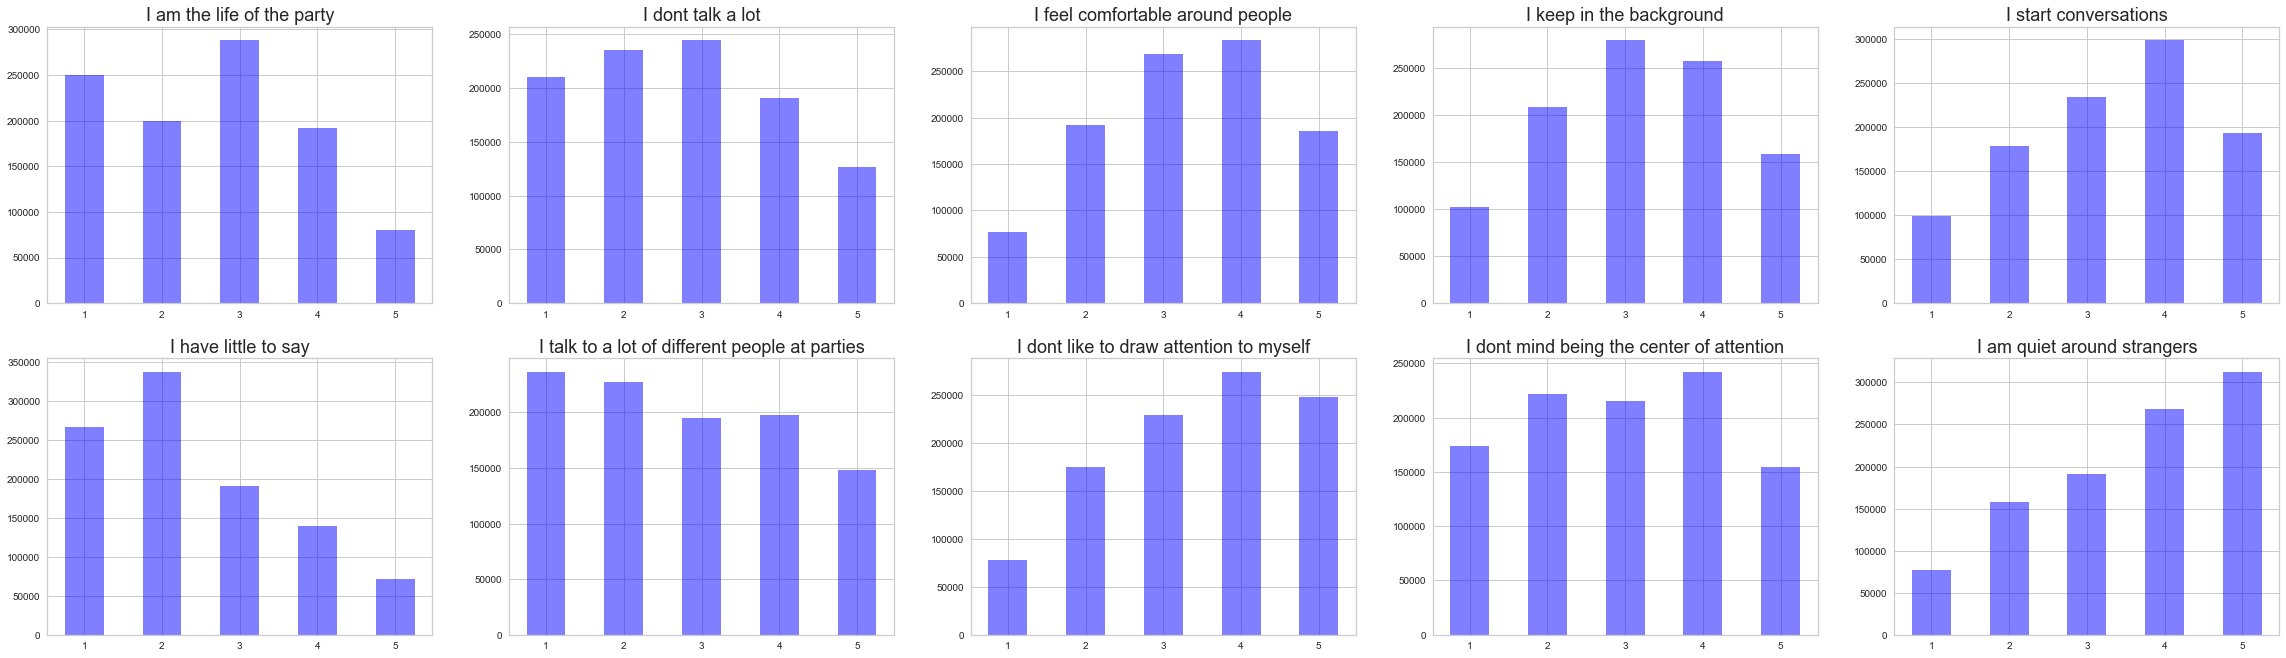

In [80]:
print('Q&As Related to Extroversion Personality')
vis_questions(EXT, ext_questions, 'blue')

## 2.2. Q&As Related to Neuroticism Personality

* EST1 : I get stressed out easily,
* EST2 : I am relaxed most of the time,
* EST3 : I worry about things,
* EST4 : I seldom feel blue,
* EST5 : I am easily disturbed,
* EST6 : I get upset easily,
* EST7 : I change my mood a lot,
* EST8 : I have frequent mood swings,
* EST9 : I get irritated easily,
* EST10: I often feel blue

Q&As Related to Neuroticism Personality


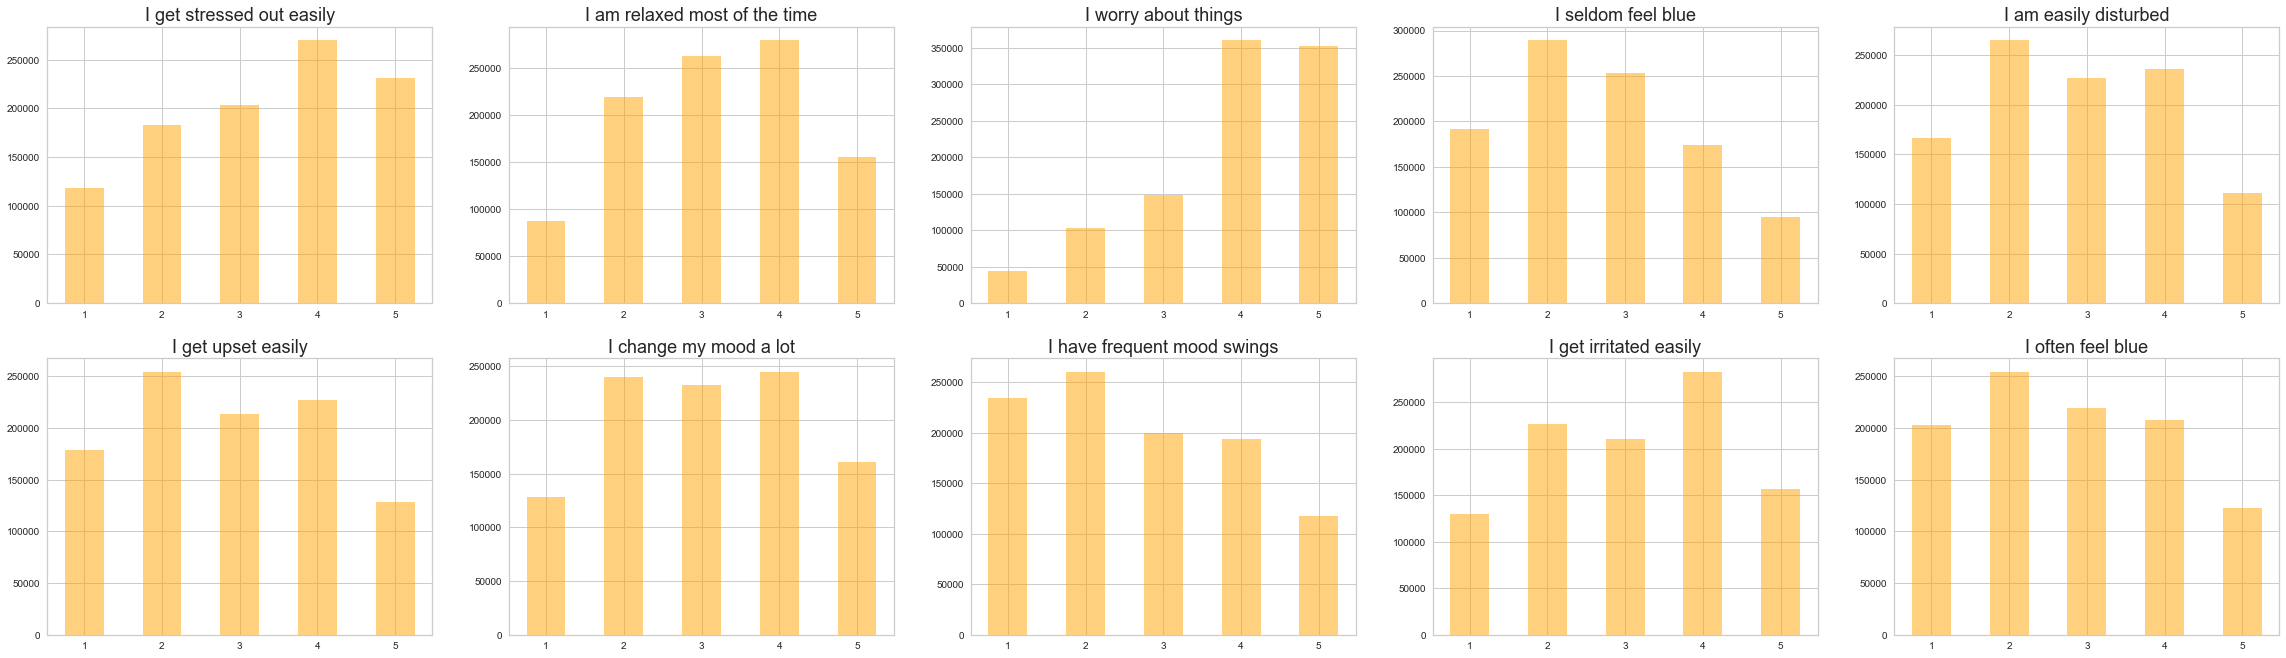

In [81]:
#barplots showing the frequency of each category 

print('Q&As Related to Neuroticism Personality')
vis_questions(EST, est_questions, 'orange')

## 2.3. Q&As Related to Agreeable Personality

* AGR1 : I feel little concern for others,
* AGR2 : I am interested in people,
* AGR3 : I insult people,
* AGR4 : I sympathize with others feelings,
* AGR5 : I am not interested in other peoples problems,
* AGR6 : I have a soft heart,
* AGR7 : I am not really interested in others,
* AGR8 : I take time out for others,
* AGR9 : I feel others emotions,
* AGR10: I make people feel at ease

Q&As Related to Agreeable Personality


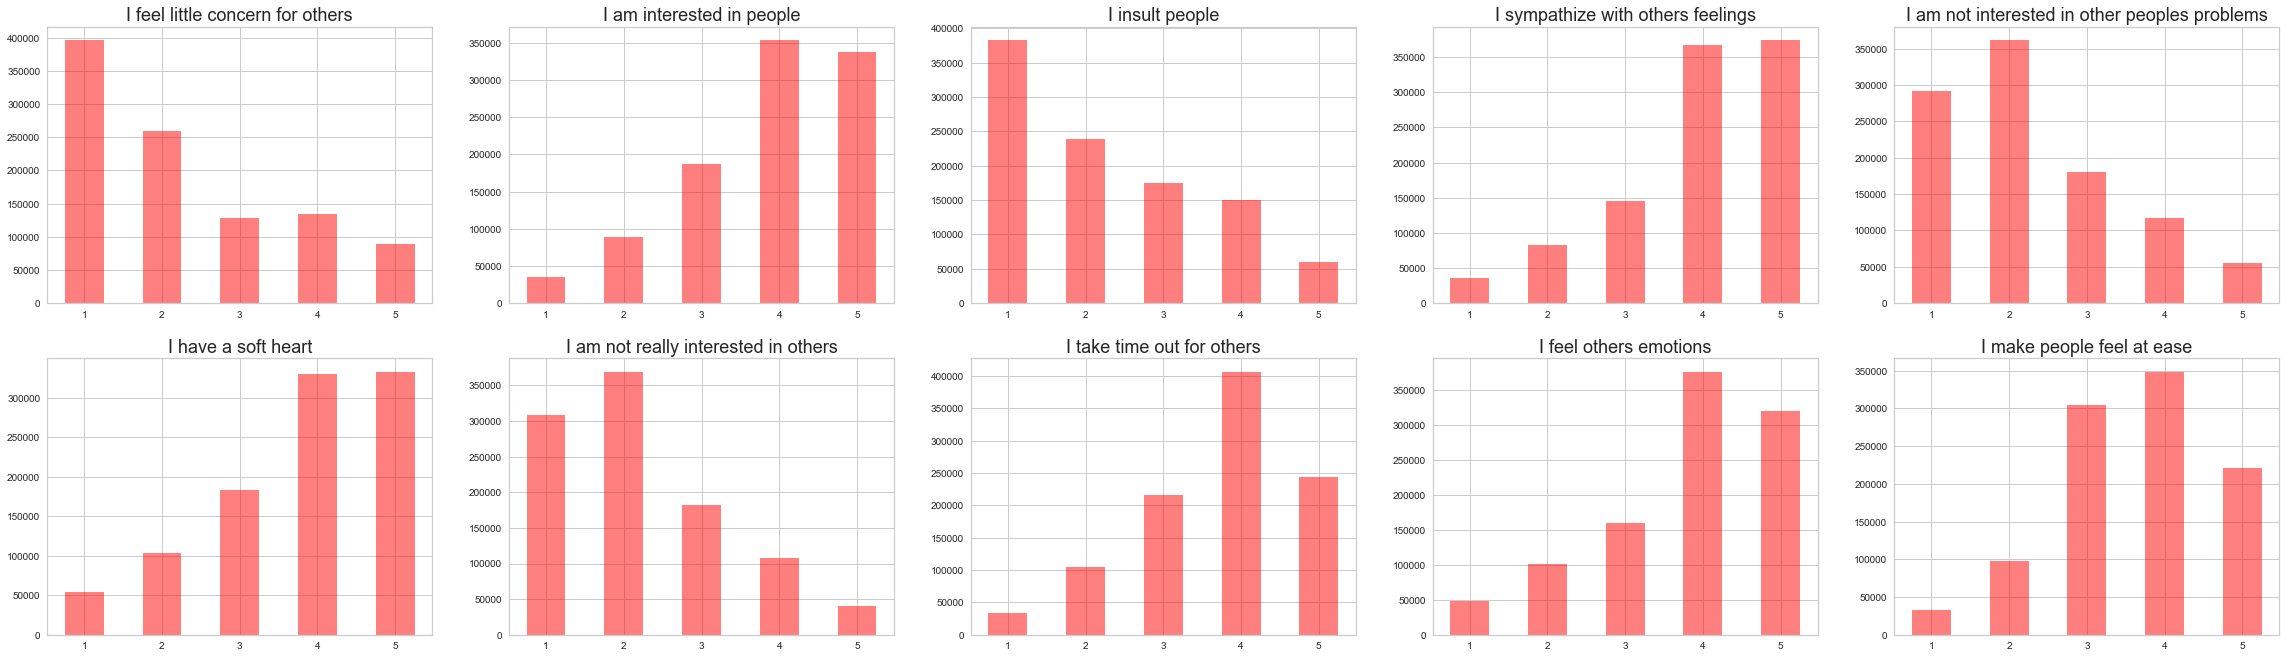

In [82]:
#barplots showing the frequency of each category 

print('Q&As Related to Agreeable Personality')
vis_questions(AGR, agr_questions, 'red')

## 2.4. Q&As Related to Conscientious Personality
 
* CSN1 : I am always prepared,
* CSN2 : I leave my belongings around,
* CSN3 : I pay attention to details,
* CSN4 : I make a mess of things,
* CSN5 : I get chores done right away,
* CSN6 : I often forget to put things back in their proper place,
* CSN7 : I like order,
* CSN8 : I shirk my duties,
* CSN9 : I follow a schedule,
* CSN10 : I am exacting in my work

Q&As Related to Conscientious Personality


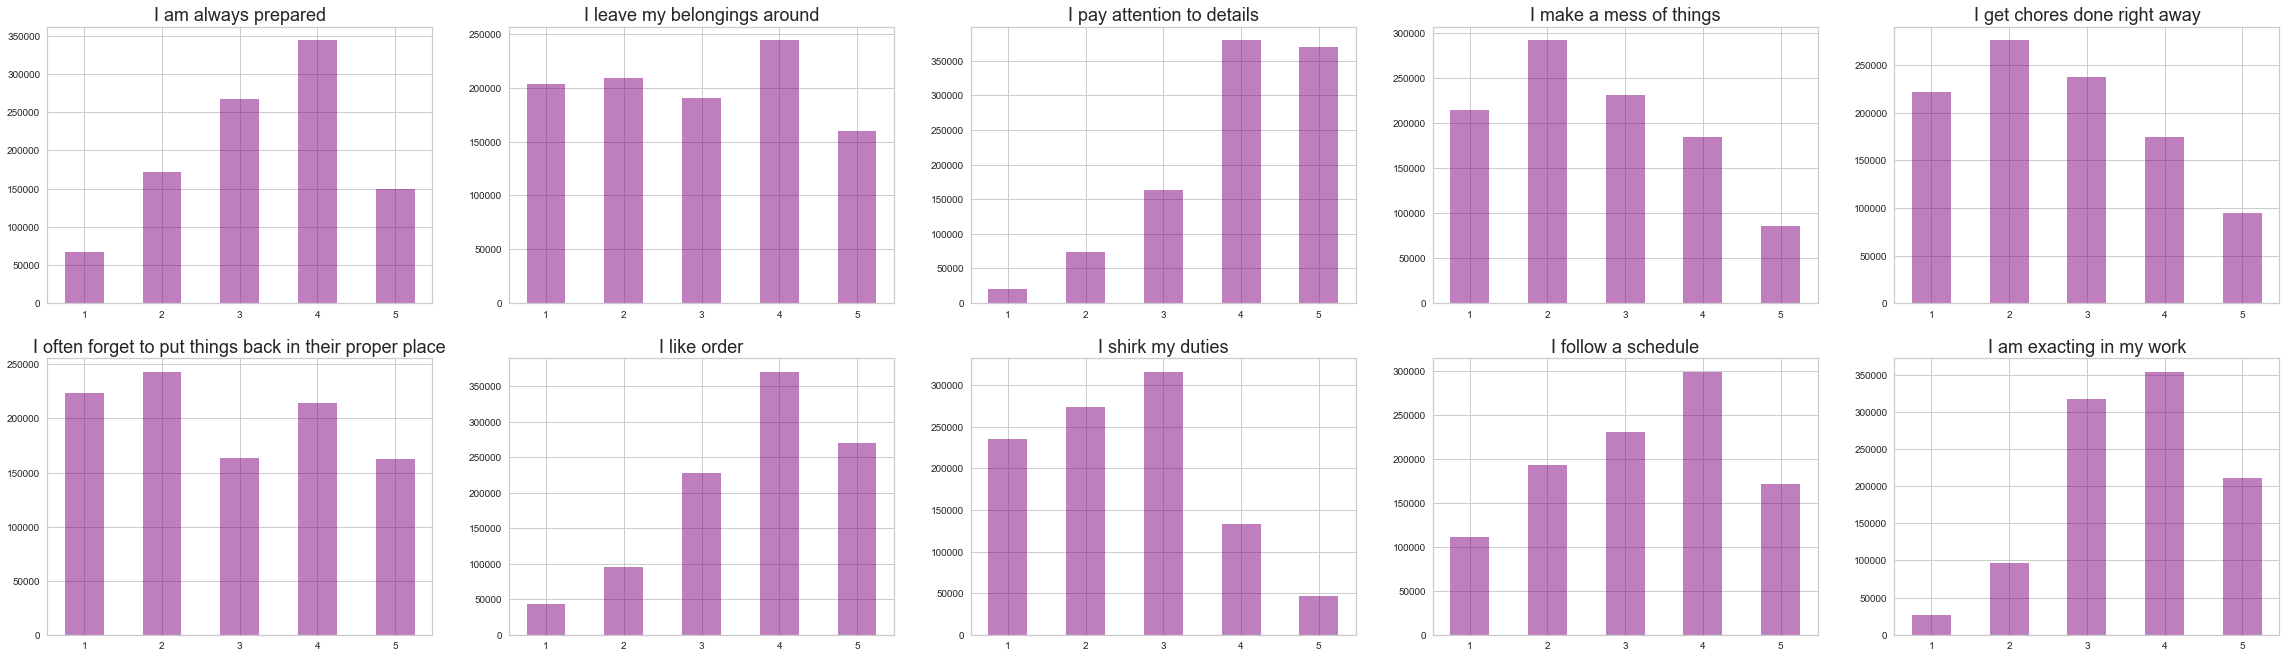

In [83]:
#barplots showing the frequency of each category 

print('Q&As Related to Conscientious Personality')
vis_questions(CSN, csn_questions, 'purple')

## 2.5. Q&As Related to Open Personality


* OPN1 : I have a rich vocabulary,
* OPN2 : I have difficulty understanding abstract ideas,
* OPN3 : I have a vivid imagination,
* OPN4 : I am not interested in abstract ideas,
* OPN5 : I have excellent ideas,
* OPN6 : I do not have a good imagination,
* OPN7 : I am quick to understand things,
* OPN8 : I use difficult words,
* OPN9 : I spend time reflecting on things,
* OPN10: I am full of ideas

Q&As Related to Open Personality


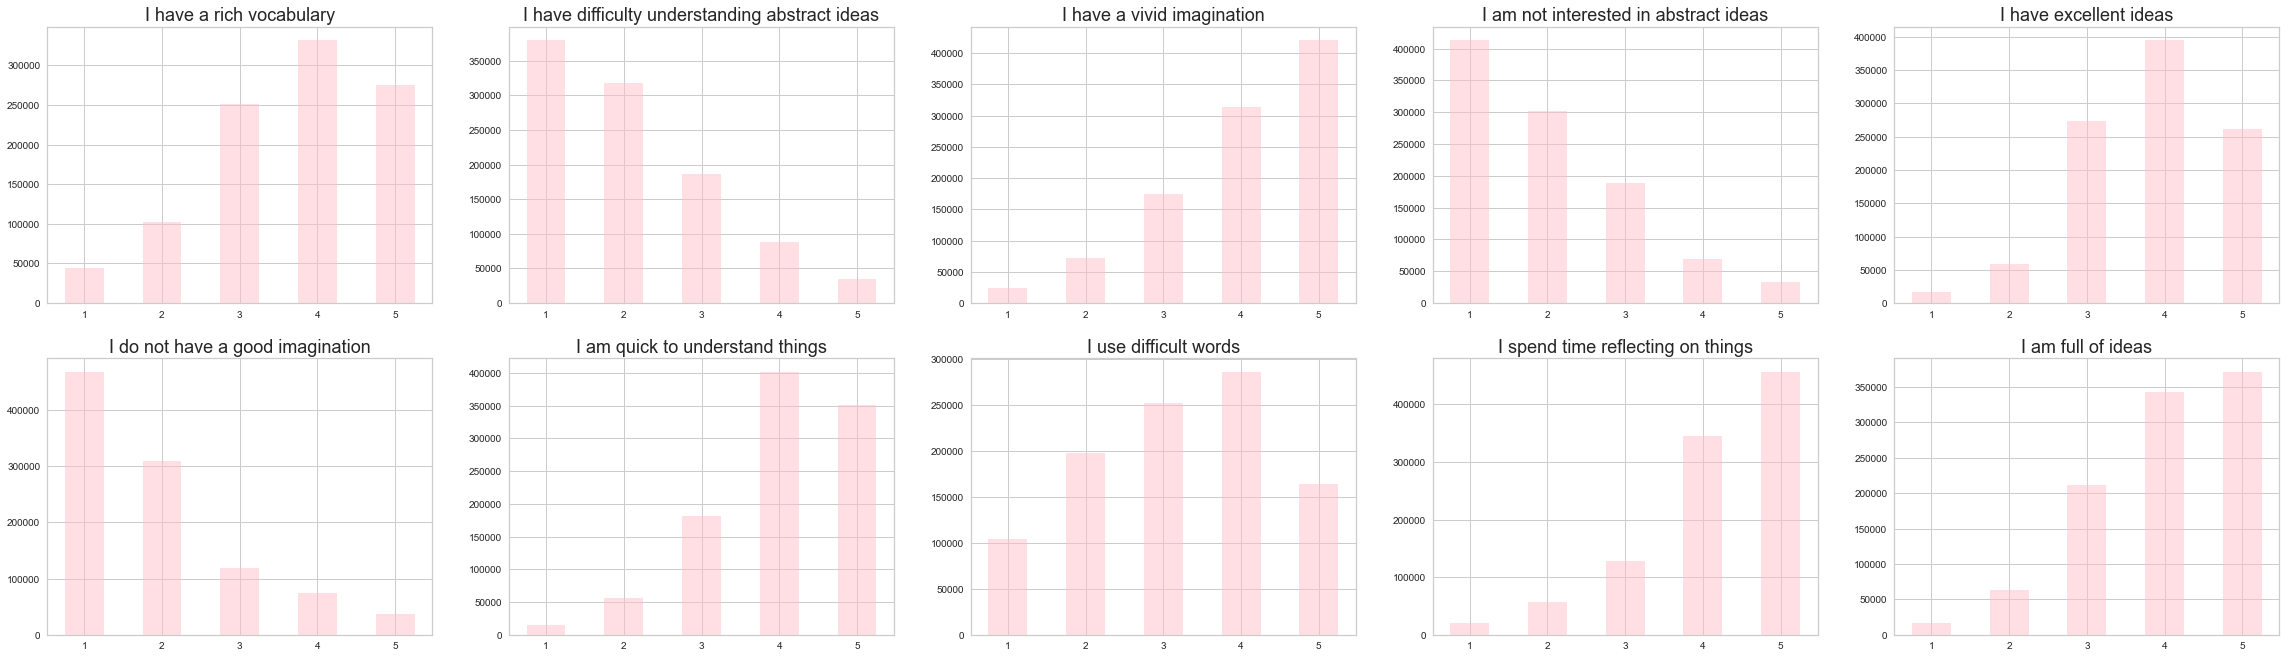

In [84]:
#barplots showing the frequency of each category 

print('Q&As Related to Open Personality')
vis_questions(OPN, opn_questions, 'pink')

# 3.Clustering

### We need to check how many clusters to define

In [85]:
# For ease of calculation we will scale all the values between 0-1 and take a sample of 5000 

from sklearn.preprocessing import MinMaxScaler

df = df.drop('country', axis=1)
columns = list(df.columns)
df_unscaled = df.copy()

scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(df)
df = pd.DataFrame(df, columns=columns)
df_sample = df[:5000]

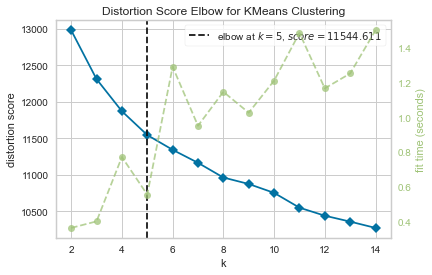

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [86]:
# Visualize the elbow

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,15))
visualizer.fit(df_sample)
visualizer.poof()

### K-Means

In [87]:
# Creating K-means Cluster Model

from sklearn.cluster import KMeans

df_model = df

#fit model
kmeans = KMeans(n_clusters=5)
k_fit = kmeans.fit(df_model)

In [88]:
# Predicting the Clusters

pd.options.display.max_columns = 10
predictions = k_fit.labels_
df_model['Clusters'] = predictions
df_model.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,...,OPN7,OPN8,OPN9,OPN10,Clusters
0,0.8,0.2,1.0,0.4,1.0,...,1.0,0.6,0.8,1.0,3
1,0.6,1.0,0.6,0.8,0.6,...,0.8,0.4,1.0,0.6,1
2,0.4,0.6,0.8,0.8,0.6,...,1.0,0.6,0.8,0.8,1
3,0.4,0.4,0.4,0.6,0.8,...,0.8,0.8,0.6,0.6,4
4,0.6,0.6,0.6,0.6,1.0,...,1.0,0.6,1.0,1.0,3


**It is not clear how many clusters look optimum for our dataset, so we have to reduce the dimensions using PCA**

In [89]:
df_model.Clusters.value_counts()

2    226911
1    213096
3    209154
0    201260
4    163060
Name: Clusters, dtype: int64

In [90]:
pd.options.display.max_columns = 150
df_model.groupby('Clusters').mean()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
Clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.361683,0.725374,0.446749,0.811037,0.457052,0.638492,0.348644,0.813936,0.434967,0.894961,0.850453,0.491545,0.901263,0.429022,0.711718,0.772154,0.797943,0.752073,0.801201,0.786222,0.498382,0.667408,0.519294,0.762783,0.515530,0.766110,0.546956,0.682974,0.731027,0.610098,0.562676,0.669438,0.763437,0.693746,0.420201,0.698025,0.713203,0.607413,0.557352,0.662648,0.700160,0.476339,0.812628,0.427286,0.686873,0.417170,0.735932,0.635446,0.855728,0.744691
1,0.425319,0.661032,0.620466,0.731719,0.592410,0.541062,0.441979,0.800051,0.465830,0.825947,0.695303,0.619936,0.827151,0.524204,0.560644,0.552310,0.568883,0.480757,0.589644,0.537125,0.377236,0.787744,0.337275,0.869972,0.397658,0.827879,0.402957,0.796382,0.834044,0.744576,0.766748,0.446573,0.859327,0.402900,0.647237,0.415583,0.831977,0.403005,0.765443,0.777715,0.714729,0.426642,0.778138,0.412329,0.745896,0.393248,0.802485,0.596419,0.852306,0.763081
2,0.689343,0.383763,0.757663,0.502072,0.807479,0.367013,0.729586,0.554461,0.751893,0.601296,0.762891,0.584906,0.849118,0.482341,0.657694,0.694010,0.761734,0.691913,0.731843,0.635338,0.432048,0.854020,0.530979,0.836502,0.400493,0.799748,0.371983,0.779307,0.826124,0.768673,0.591792,0.720103,0.768450,0.646847,0.447820,0.703687,0.692409,0.565436,0.589915,0.696068,0.747530,0.423880,0.849166,0.393641,0.791129,0.354653,0.792267,0.674650,0.837882,0.839776
3,0.695852,0.387264,0.868338,0.442336,0.853751,0.332349,0.778651,0.560211,0.750278,0.501242,0.463935,0.764467,0.630193,0.656775,0.422885,0.379916,0.422177,0.335384,0.423399,0.343551,0.379230,0.886335,0.367175,0.848714,0.371868,0.768479,0.317723,0.819018,0.819294,0.838850,0.742498,0.517176,0.837725,0.380288,0.626820,0.457285,0.773163,0.387615,0.715154,0.774651,0.777468,0.350519,0.816827,0.358777,0.831942,0.330707,0.862977,0.647645,0.818859,0.859442
4,0.437712,0.657223,0.557291,0.680624,0.516455,0.552541,0.423545,0.704536,0.529853,0.757248,0.469666,0.723048,0.598121,0.583021,0.465378,0.403835,0.462020,0.386179,0.518234,0.450509,0.607746,0.583834,0.517709,0.551103,0.632536,0.526793,0.602646,0.567478,0.517405,0.593827,0.627224,0.567254,0.732378,0.483491,0.472442,0.549724,0.674301,0.504129,0.552263,0.666863,0.707256,0.395598,0.723053,0.411808,0.724251,0.408625,0.776444,0.622730,0.738829,0.733249


In [91]:
# Summing up the different questions groups

col_list = list(df_model)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

data_sums = pd.DataFrame()
data_sums['extraversion'] = df_model[ext].sum(axis=1)/10
data_sums['neuroticism'] = df_model[est].sum(axis=1)/10
data_sums['agreeableness'] = df_model[agr].sum(axis=1)/10
data_sums['conscientiousness'] = df_model[csn].sum(axis=1)/10
data_sums['openness'] = df_model[opn].sum(axis=1)/10
data_sums['clusters'] = predictions
df_cluster = data_sums.groupby('clusters').mean()
df_cluster

,extraversion,neuroticism,agreeableness,conscientiousness,openness
clusters,,,,,
0,0.593290,0.729360,0.630056,0.634814,0.649225
1,0.610582,0.595596,0.637572,0.631651,0.648527
2,0.614457,0.685179,0.659988,0.642253,0.670457
3,0.617027,0.484268,0.641669,0.621238,0.665516
4,0.581703,0.506001,0.570108,0.583007,0.624184


## 3.1 PCA (Principal Component Analysis)

PCA is an unsupervised machine learning technique that attempts to derive a set of low-dimensional set of features from a much larger set while still preserving as much variance as possible.

In [92]:
# In order to visualize in 2D graph and improve our prediction results, we will use PCA to reduce dimensions

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_fit = pca.fit_transform(df)

df_pca = pd.DataFrame(data=pca_fit, columns=['PCA1', 'PCA2'])

df_pca['Clusters'] = predictions
df_pca.head()

,PCA1,PCA2,Clusters
0,1.360005,-0.747271,3
1,-0.900612,0.100513,1
2,-0.827234,-0.054015,1
3,1.930584,0.550333,4
4,1.248482,-0.493289,3


## 3.2 K-means Clustering

K-means is a centroid-based algorithm, or a distance-based algorithm, where we calculate the distances to assign a point to a cluster. In K-Means, each cluster is associated with a centroid.

3.2.1 Using elbow method to determine best number of clusters

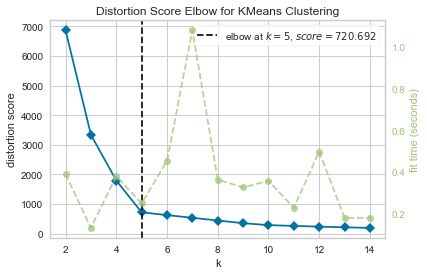

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [93]:
# Visualize the elbow to check best number of clusters using 5000 samples

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,15))
visualizer.fit(df_pca[5000:10000])
visualizer.poof()

The elbow method shows that 5 is the best number of clusters. We will go ahead to double-check using the silhouette score

3.2.2 Using silhouette method to determine best number of clusters

For n_clusters = 2 , The average silhouette_score is : 0.5796343169344814
For n_clusters = 3 , The average silhouette_score is : 0.5965908368859567
For n_clusters = 4 , The average silhouette_score is : 0.6216111311666013
For n_clusters = 5 , The average silhouette_score is : 0.7228737159599321
For n_clusters = 6 , The average silhouette_score is : 0.6747482968762947
For n_clusters = 7 , The average silhouette_score is : 0.6443011212468934
For n_clusters = 8 , The average silhouette_score is : 0.5958488071522506
For n_clusters = 9 , The average silhouette_score is : 0.555407205147375
For n_clusters = 10 , The average silhouette_score is : 0.503271688454476


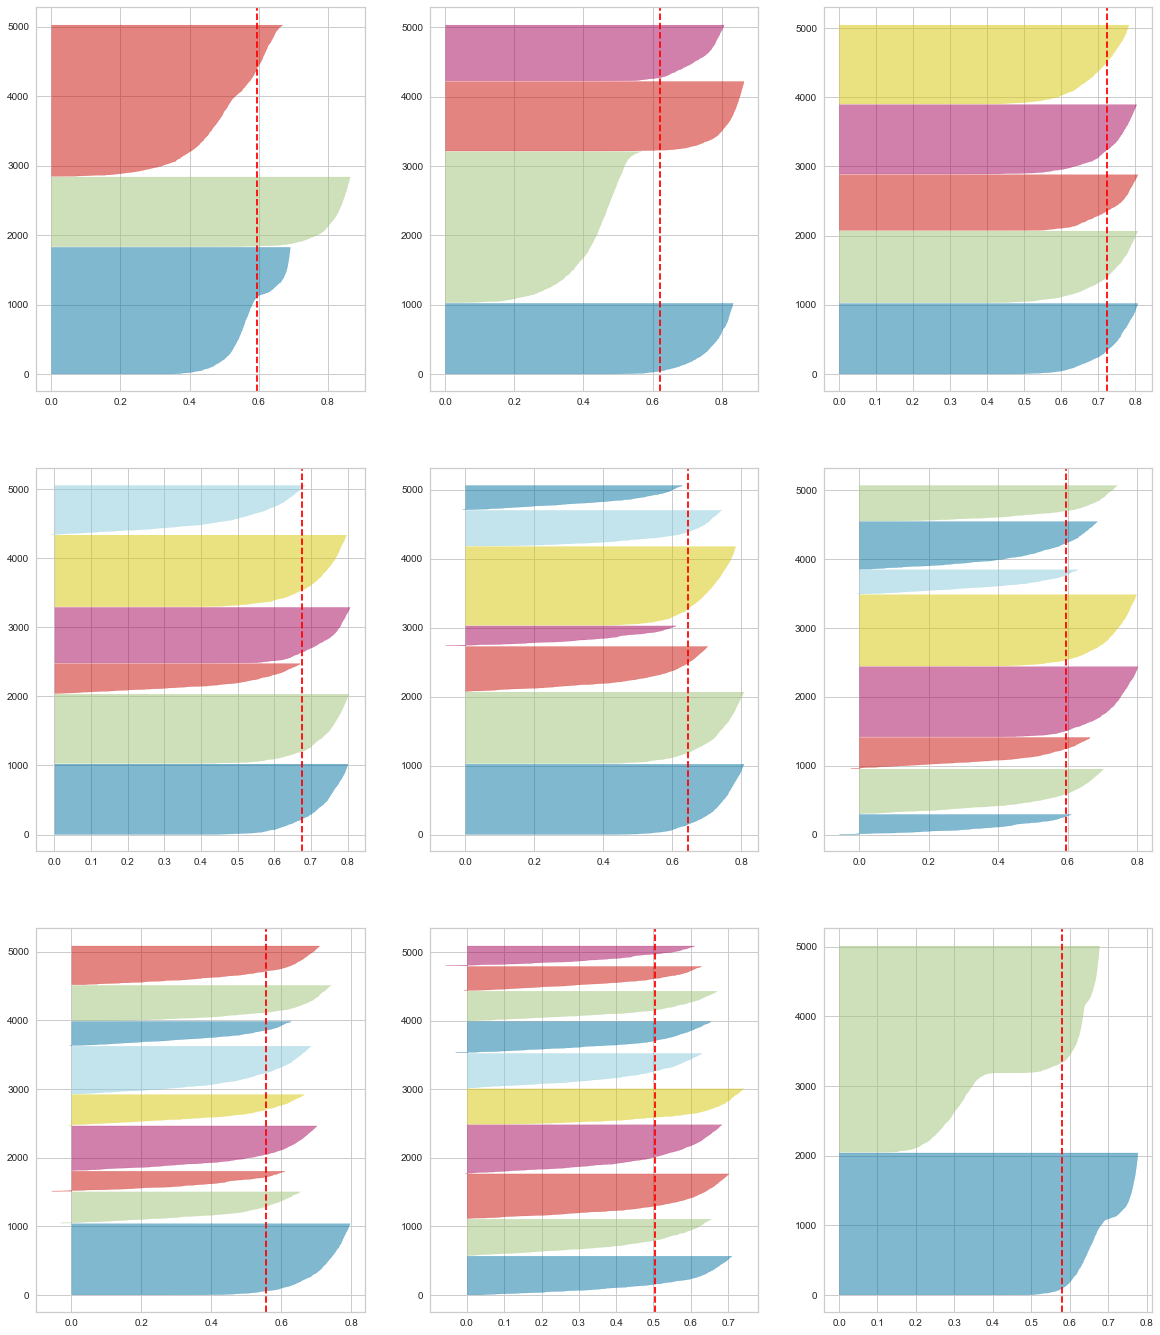

In [94]:
# Using silhouette score to check best number of clusters using 5000 samples

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

range_n_clusters = [2,3,4,5,6,7,8,9,10]
#fit model
fig, ax = plt.subplots(3, 3 , figsize=(20,24))
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters)
    k_fit = kmeans.fit_predict(df_pca[5000:10000])
    silhouette_avg = silhouette_score(df_pca[5000:10000], k_fit, metric='euclidean')
    print("For n_clusters =", n_clusters,
                  ", The average silhouette_score is :", silhouette_avg)
    q, mod = divmod(n_clusters, 3)
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df_pca[5000:10000])

The silhoutte plot also shows that 5 clusters is the best for our model with score 0.82 which is closest to 1. We can now go ahead to model our data

In [95]:
# Creating K-means Cluster Model

#fit model
kmeans = KMeans(n_clusters=5)
k_fit = kmeans.fit(df_pca)

In [96]:
# Predicting the Clusters

pd.options.display.max_columns = 10
predictions = k_fit.labels_
df_pca['Clusters'] = predictions
df_pca.head()

,PCA1,PCA2,Clusters
0,1.360005,-0.747271,2
1,-0.900612,0.100513,1
2,-0.827234,-0.054015,1
3,1.930584,0.550333,0
4,1.248482,-0.493289,2


### 3.3  Analyzing model and predictions

How many individuals are present for each cluster

In [97]:
df_pca.Clusters.value_counts()

4    226911
1    213096
2    209154
3    201260
0    163060
Name: Clusters, dtype: int64

In [98]:
# Summing up the different questions groups

col_list = list(df)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

data_sums = pd.DataFrame()
data_sums['extraversion'] = df[ext].sum(axis=1)/10
data_sums['neuroticism'] = df[est].sum(axis=1)/10
data_sums['agreeableness'] = df[agr].sum(axis=1)/10
data_sums['conscientiousness'] = df[csn].sum(axis=1)/10
data_sums['openness'] = df[opn].sum(axis=1)/10
data_sums['clusters'] = predictions
df_cluster = data_sums.groupby('clusters').mean()
df_cluster

,extraversion,neuroticism,agreeableness,conscientiousness,openness
clusters,,,,,
0,0.581703,0.506001,0.570108,0.583007,0.624184
1,0.610582,0.595596,0.637572,0.631651,0.648527
2,0.617027,0.484268,0.641669,0.621238,0.665516
3,0.593290,0.729360,0.630056,0.634814,0.649225
4,0.614457,0.685179,0.659988,0.642253,0.670457


Text(0.5, 1.0, 'Personality Clusters after PCA')

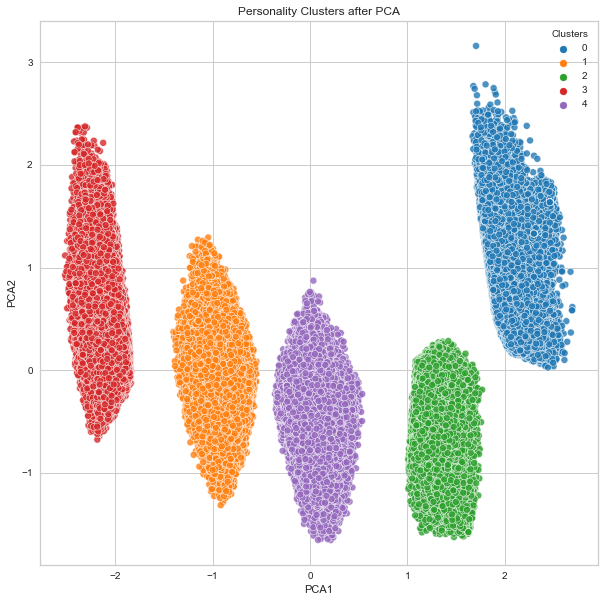

In [99]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Clusters', palette='tab10', alpha=0.8)
plt.title('Personality Clusters after PCA')

The results show how separated our clusters are and shows that they can be used to predict the big 5 personalities

## Implementing the model to predict my personality cluster

In [100]:
my_data = pd.read_excel('input_data.xlsx')
my_data

,EXT1,EXT2,EXT3,EXT4,EXT5,...,OPN6,OPN7,OPN8,OPN9,OPN10
0,2,3,3,2,2,...,1,5,2,5,5


In [101]:
my_scaled_df = df_unscaled.copy().append(my_data)
my_scaled_df = scaler.fit_transform(my_scaled_df)
print(my_scaled_df[-1])

[0.4 0.6 0.6 0.4 0.4 1.  0.4 0.8 1.  0.8 0.4 0.6 0.8 1.  0.4 0.4 0.2 0.2
 0.6 0.2 0.4 1.  0.2 1.  0.4 1.  0.2 0.6 1.  1.  1.  0.2 0.8 0.2 0.8 0.2
 1.  0.4 1.  1.  0.6 0.4 0.8 0.4 1.  0.2 1.  0.4 1.  1. ]


In [102]:
my_data_pca_fit = pca.fit_transform(my_scaled_df)
my_data_pca = pd.DataFrame(data=my_data_pca_fit, columns=['PCA1', 'PCA2'])
my_data_pca

,PCA1,PCA2
0,-1.089145,-0.297682
1,0.051711,0.609788
2,-0.123903,0.430384
3,0.225763,0.049689
4,-0.938973,0.494849
...,...,...
1013477,0.406504,-0.740391
1013478,-0.301958,-0.678327
1013479,0.461314,0.224562
1013480,-0.523294,-0.479757


In [104]:
my_data_pca['Clusters'] = kmeans.fit(my_data_pca).labels_

In [109]:
my_personality = my_data_pca['Clusters'].iloc[-1]

print('My Personality Cluster: ', my_personality)

My Personality Cluster:  2


In [110]:
# Summing up my question groups
col_list = list(my_data)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

my_sums = pd.DataFrame()
my_sums['extroversion'] = my_data[ext].sum(axis=1)/10
my_sums['neurotic'] = my_data[est].sum(axis=1)/10
my_sums['agreeable'] = my_data[agr].sum(axis=1)/10
my_sums['conscientious'] = my_data[csn].sum(axis=1)/10
my_sums['open'] = my_data[opn].sum(axis=1)/10
my_sums['cluster'] = my_personality
print('Sum of my question groups')
my_sums

Sum of my question groups


,extroversion,neurotic,agreeable,conscientious,open,cluster
0,3.2,2.4,3.4,3.3,3.4,2
